# HM2, kNN versus GaussianNB

## 1 Digits Data Set

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

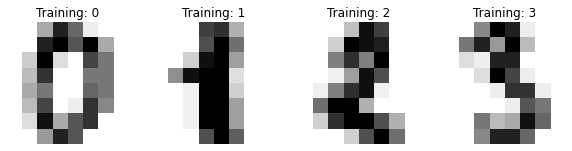

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets

# 1. load 
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [2]:
X, y = digits.data, digits.target

# partition data with train_test_spli

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,stratify=y,random_state=42)

print("train size:",len(X_train),"\ntest size:",len(X_test))

train size: 1257 
test size: 540


In [3]:
# 2. learn classifier
knn1= KNeighborsClassifier(n_neighbors=1)
knn3= KNeighborsClassifier(n_neighbors=3)
gauss=GaussianNB()

knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)
gauss.fit(X_train, y_train);


In [4]:
# 3. test classifiers
y_pred1 = knn1.predict(X_test)
y_pred3 = knn3.predict(X_test)
y_predg = gauss.predict(X_test)
print("knn1 accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred1),2))
print("knn3 accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred3),2))
print("Gauss accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_predg),2))


knn1 accuracy on testing set: 0.99
knn3 accuracy on testing set: 0.99
Gauss accuracy on testing set: 0.82
